# Содержание
- [1. Анализ А/В теста](#6)
   - [1.1 Изучим данные](#7)
       - [1.1.1 Изучим данные о визитах пользователей](#8)
       - [1.1.2 Изучим данные о заказах пользователей](#9)
       - [1.1.3 Общий вывод по качеству данных](#10)
   - [1.2 Анализ кумулятивных метрик](#11)
       - [1.2.1 Кумулятивная выручка по группам](#12)
       - [1.2.2 Кумулятивный средний чек по группам](#13)
       - [1.2.3 Относительное изменение кумулятивного среднего чека группы В к группе А](#14)
       - [1.2.4 Кумулятивное среднее количество заказов на посетителя по группам](#15)
       - [1.2.5 Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к группе А](#16)
       - [1.2.6 Вывод](#17)
   - [1.3 Анализ количества заказов](#18)
       - [1.3.1 Точечный график количества заказов по пользователям](#19)
       - [1.3.2 Считаем 95-й и 99-й перцентили количества заказов на пользователя, для выбора границы аномальных пользователей](#20)
   - [1.4 Анализ стоимостей заказов](#21)
       - [1.4.1 Точечный график стоимостей заказов](#22)
       - [1.4.2 Считаем 95-й и 99-й перцентили стоимости заказов, для выбора границы аномальных заказов](#23)
       - [1.4.3 Вывод](#24)
   - [1.5 Анализ статистической значимости различий между групами по "сырым" и "очищенным" данным](#25)
       - [1.5.1 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным](#26)
       - [1.5.2 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#27)
       - [1.5.3 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным](#28)
       - [1.5.4 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#29)
       - [1.5.5 Вывод](#30)
- [2. Решение по результатам теста](#31)

# Исследование гипотез и анализ результатов А/В тестирования

Цель - вместе с отделом маркетинга подготовить список гипотез для увеличения выручки, запустить А/В тест исследования и проанализировать результаты.

Задачи:
- Изучим гипотезы и проведем их приоритезацию
- Изучим данные А/В теста на наличие ошибок и не качественных данных
- Выведем и проанализаруем кумулятивные метрики
- Проанализируем статистические значимости различий в метриках и вынесем решение по результатам теста

Перед началом работы введем все функции, которые понадобяться нам для работы

In [1]:
#Определим функцию для вывода всей информации о данных в таблице
def inf_data(df):
    print('Первые 10 строк таблицы')
    display(df.head(10))
    pd.set_option('display.max_columns', None)
    print('----------')
    
    print('Общая информация о таблице')
    df.info()
    print('----------')
    
    print('Выведем наименование колонок')
    display(df.columns)
    print('----------')
    
    print('Посмотрим на типы данных')
    display(df.dtypes)
    print('----------')
    
    print('Проверим присутствуют ли пропуски в данных')
    display(df.isna().sum())
    print('----------')
    
    if df.duplicated().sum() == 0:
        print('Явных дубликатов нет')
    else:
        print('В данных присутствуют явные дубликаты')

In [2]:
#Определим функцию настройки внешнего вида графиков кумулятивных метрик
def plt_view(xlabel, ylabel, title):
    plt.legend()
    plt.xticks(orders['date'].unique(), rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
#Определим функцию настройки внешнего вида точечных графиков
def plt_scat_view(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [3]:
#Импортируем все необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Анализ А/В теста
<a id='6'></a>

### Изучим данные
<a id="7"></a>

In [12]:
#Откроем
try:
    orders, visitors  = (
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )
except:
    orders, visitors = (
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )

#### Изучим данные о визитах пользователей
<a id="8"></a>

In [13]:
#Изучим данные по визитам
inf_data(visitors)

Первые 10 строк таблицы


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


----------
Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
----------
Выведем наименование колонок


Index(['date', 'group', 'visitors'], dtype='object')

----------
Посмотрим на типы данных


date        object
group       object
visitors     int64
dtype: object

----------
Проверим присутствуют ли пропуски в данных


date        0
group       0
visitors    0
dtype: int64

----------
Явных дубликатов нет


В данных присутствует информация о том в какую дату в какой группе сколько пользователей пришло. Дубликатов и пропусков в данных не имеется, однако тип даты не соответствует действительности - исправим это

In [14]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

Теперь необходимо проверить качество самих данных:
 - количество визитов в каждой исследуемой группе должно быть примерно одинаковым

In [15]:
#Проверим количество визитов в каждой группе
print('Количество посетителей во всем исследовании - {}'
      .format(visitors['visitors'].sum()))
print()
print('Количество посетителей в каждой группе')
v_g = visitors.groupby('group', as_index=False).agg({'visitors':'sum'})
v_g['perc'] = v_g['visitors'] / v_g['visitors'].sum() * 100
v_g

Количество посетителей во всем исследовании - 37652

Количество посетителей в каждой группе


,group,visitors,perc
0,A,18736,49.76
1,B,18916,50.24


Присутствует небольшое отличие в количестве визитов, но оно менее 1% поэтому не критично.

#### Изучим данные о заказах пользователей
<a id="9"></a>

In [16]:
#Изучим данные по заказам
inf_data(orders)

Первые 10 строк таблицы


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


----------
Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
----------
Выведем наименование колонок


Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

----------
Посмотрим на типы данных


transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object

----------
Проверим присутствуют ли пропуски в данных


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

----------
Явных дубликатов нет


В данных присутствует информация о заказах совершенных определенными пользователями в определенных группах на указанную дату. Дубликатов и пропусков в данных не имеется, однако тип даты не соответствует действительности и наименование колонок можно немного подправить - исправим это

In [17]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [18]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Теперь необходимо проверить качество самих данных:
 - каждый пользователь должен был попасть только в одну группу

In [19]:
double_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'group':'nunique'}).query('group > 1')
)
print('Количество пользователей, попавших сразу в обе исследуемые группы - {}'
      .format(len(double_users)))

Количество пользователей, попавших сразу в обе исследуемые группы - 58


In [20]:
#Оценим % задвоенных, по отношению к общему количеству посетителей
print('Процент задвоенных пользователей {0:.2%}'
      .format(len(double_users) / orders['visitor_id'].nunique()))

Процент задвоенных пользователей 5.63%


Целых 58 человек (около 6% от всего количества посетителей) попали сразу в обе группы - необходимо найти таких пользователей и отчистить данные от них. По итогу нашего тестирования - важно понимание существует ли разница между исследуемыми группами и какая из них лучше. А если пользователь по итогу попал в обе группы, то мы не знаем какая имеено из них повлияла на его решение совершить заказ в нашем интернет-магазине. Поэтому важно удалить данные заказов этих пользователей - для корректной интерпретации результата тестирования.

In [21]:
#Сохраним в список только id этих пользователей
double_users = list(double_users['visitor_id'])

Теперь удаляем пользователей из таблицы с заказами

In [22]:
orders = orders.query('visitor_id != @double_users').reset_index(drop=True)

In [23]:
print('Количество пользователей, попавших сразу в обе исследуемые группы - {}'
      .format(len(orders.groupby('visitor_id', as_index=False)
                  .agg({'group':'nunique'}).query('group > 1'))))

Количество пользователей, попавших сразу в обе исследуемые группы - 0


В данных о заказах больше нет пользователей, совершивших заказы в обеих исследуемых группах.

Теперь, мы можем оценить количество уникальных пользователей совершивших заказы

In [24]:
print('Количество уникальных пользователей, совершивших заказ, во всем исследовании - {}'
      .format(orders['visitor_id'].nunique()))
print()
print('Количество уникальных пользователей, совершивших заказ, в каждой группе')
o_g = orders.groupby('group', as_index=False).agg({'visitor_id':'nunique'})
o_g['perc'] = o_g['visitor_id'] / o_g['visitor_id'].sum() * 100
o_g

Количество уникальных пользователей, совершивших заказ, во всем исследовании - 973

Количество уникальных пользователей, совершивших заказ, в каждой группе


,group,visitor_id,perc
0,A,445,45.73
1,B,528,54.27


Мы видим, что в группе В присутствует перевес по количеству уникальных пользователей совершивших заказы, однако как мы помним, количество посетителей обеих групп практически одинаковое. Можно предположить, что в группе В посетители больше склонны делать заказы.

Оценим временные рамки теста

In [25]:
if visitors['date'].min() == orders['date'].min() and visitors['date'].max() == orders['date'].max():
    print('Дата начала теста - {}, дата окончания теста - {}'.format(orders['date'].min(), orders['date'].max()))
else:
    print('Временные рамки в данных о визитах и заказах не совпадают')

Дата начала теста - 2019-08-01 00:00:00, дата окончания теста - 2019-08-31 00:00:00


Тест проходил с 1 августа 2009 года по 31 августа 2009 года

#### Общий вывод по качеству данных
<a id="10"></a>

Входные данные - информация о визитах и заказах пользователей в каждой группе на каждую дату. Дубликатов и пропусков не обнаружено. Однако типы дат не соответствовали действительности - исправила. Также немного подправила наименование колонок в данных о заказах.

При анализе распределения потоков пользователей между группами нашли небольшое различие, однако оно менее 1%, что не катастрофично (группа А - 49,76%, группа В - 50,24%)

Однако при анализе распределения пользователей по группам, нашли 58 пользователей, которые попали сразу в обе группы - данные о них из заказов были удалены.

Возможно произошел технический сбой при "обнаружении своего пользователя" при повторном посещении сайта, возможно не верно был настроен инструмент "деления"\"обнаружения" трафика
Чтобы в будущем не допустить не правильного распределения потоков между группами, как вариант, можно провести пробный А/А тест, чтобы предусмотреть все возможные варианты.

### Анализ кумулятивных метрик
<a id="11"></a>

Перед тем, как изучать кумулятивные метрики (выручка и средний чек) по отдельности соберем все данные вместе в одном датафрейме

In [26]:
#Так как нам нужны накопленные данные по каждой группе на каждый день,
#создадим массив уникальных пар "дата-группа" Из данных о заказах
dates_group = orders[['date', 'group']].drop_duplicates()

#Теперь с помощью этого массива и таблицы с заказами
#собираем суммарные данные о количестве заказов,
#количестве уникальных покупателей 
#и сумме выручки заказов в группе теста
#на указанную дату включительно
orders_aggregated = (
    dates_group.apply(lambda x: orders[np.logical_and(orders['date']<=x['date'], orders['group']==x['group'])]
                      .agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}),
                      axis=1).sort_values(by=['date', 'group'])
)
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
45,2019-08-01,A,23,19,142779
54,2019-08-01,B,17,17,59758
149,2019-08-02,A,42,36,234381
147,2019-08-02,B,40,39,221801
245,2019-08-03,A,66,60,346854


In [27]:
#Теперь необходимо собрать сумарные данные о количестве визитов
#на указанный день в конкретной группе
visitors_aggregated = (
    dates_group.apply(lambda x: visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])]
                     .agg({'date':'max', 'group':'max', 'visitors':'sum'}),
                      axis=1).sort_values(by=['date', 'group'])
)
visitors_aggregated.head()

,date,group,visitors
45,2019-08-01,A,719
54,2019-08-01,B,713
149,2019-08-02,A,1338
147,2019-08-02,B,1294
245,2019-08-03,A,1845


In [28]:
#Необходимо объединить все наши полученные данные
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])

In [29]:
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Теперь приступим к анализу выручки и среднего чека

#### Кумулятивная выручка по группам
<a id="12"></a>

In [30]:
#Выведем отдельно данные по кумулятивной выручки и количеству заказов для каждой группы
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue','orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue','orders']]

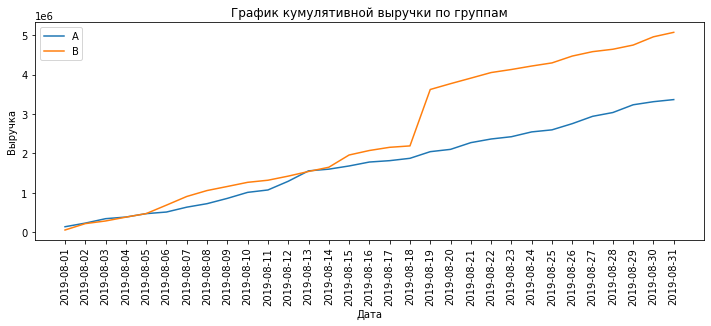

In [31]:
#Строим график выручки группы А и В
fig = plt.figure(figsize=(12,4))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt_view('Дата', 'Выручка', 'График кумулятивной выручки по группам');

Мы видим, что 19 августа был резкий скачек в выручке группы В. До этого момента группа В немного опережала группу А. И после скачка группа В лидирует и показатели ее выручки только растут. Показатели группы А также растут.
Возможно скачек связан с какими то аномально большими покупками в этот день. Если это действительно так, то в заключительном анализе их нужно будет удалить.

#### Кумулятивный средний чек по группам
<a id="13"></a>

Теперь по нашим кумулятивным данным рассмотрим как меняется средний чек по группам. Для этого разделим кумулятивную выручку на кумулятивное число заказов

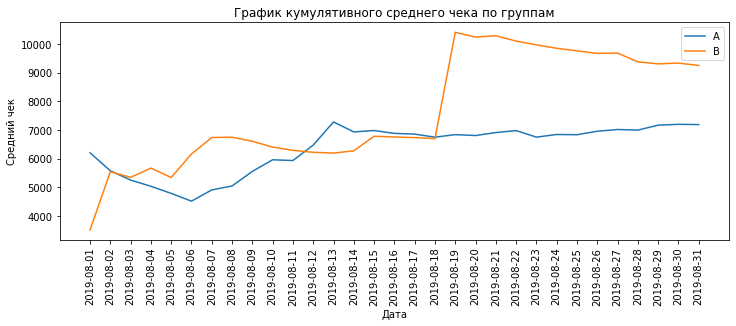

In [32]:
fig = plt.figure(figsize=(12,4))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt_view('Дата', 'Средний чек', 'График кумулятивного среднего чека по группам');

На графике средних чеков, мы также видим резкий скачек 19 августа в группе В, и еще несколько колебаний в обеих группах. И видно, что группа В лидирует сильно превышая значения группы А, однако сразу после скачка размер среднего чека начал понемногу падать. 
Возможно покупок стало становится больше, а их средняя стоимость меньше.
Однако скачек в группе В может сильно искажать результаты, особенно в случае падения кумулятивных значений среднего чека.

#### Относительное изменение кумулятивного среднего чека группы В к группе А
<a id="14"></a>

Для того что рассмотреть относительное изменение среднего чека группы В к группе А, начала необходимо объединить наши данные по кумулятивным выручкам

In [33]:
cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, on='date', suffixes=('_a', '_b'))
cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


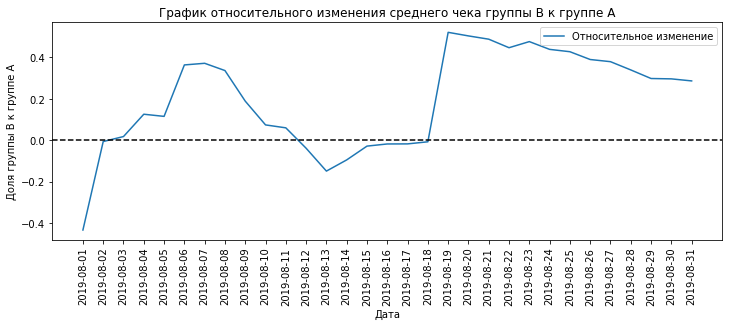

In [34]:
fig = plt.figure(figsize=(12,4))
plt.plot(
    cumulative_revenue['date'],
    (cumulative_revenue['revenue_b']/cumulative_revenue['orders_b'])/
    (cumulative_revenue['revenue_a']/cumulative_revenue['orders_a'])-1,
    label='Относительное изменение'
)
plt_view('Дата', 'Доля группы В к группе А', 'График относительного изменения среднего чека группы В к группе А')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Мы видим много колебаний:
- сначала результаты группы А были лучше, но уже на 3 день группа В стала опережать группу А,
- однако с 8 дня теста результаты группы В стали сильно ухудшаться и с 11 по 18 день показатели у группы А стали лучше
- однако резкий скачек 19го дня вернул лидирующие позиции группе В,
- однако после вновь средний чек группы В стал ухудшаться по сравнению со средним чеком группы А.

Скорее всего, именно в эти даты были совершены аномальные заказы в той или иной группе

#### Кумулятивное среднее количество заказов на посетителя по группам
<a id="15"></a>

Нужно оценить среднее количество заказов на посетителя в каждой группе. Добавим стоблец, в котором расчитаем этот показатель, как отношение числа заказов к количеству пользователей в указанной группе в указанный день

In [35]:
cumulative_data['avg_orders'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,avg_orders
0,2019-08-01,A,23,19,142779,719,0.03
1,2019-08-01,B,17,17,59758,713,0.02
2,2019-08-02,A,42,36,234381,1338,0.03
3,2019-08-02,B,40,39,221801,1294,0.03
4,2019-08-03,A,66,60,346854,1845,0.04


In [36]:
#Разделим на две таблицы в зависмости от группы
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

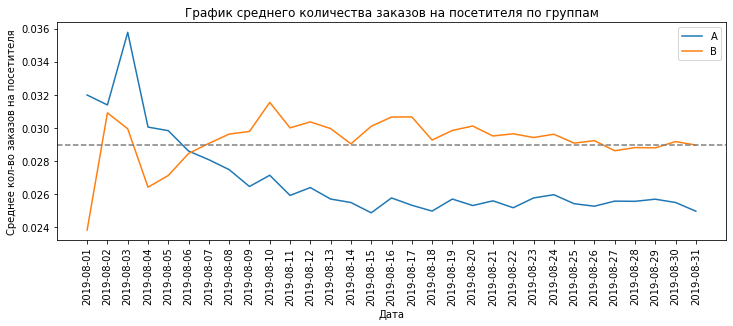

In [37]:
#Пострим графики среднего количества заказов на посетителя по группам
fig = plt.figure(figsize=(12,4))
plt.plot(cumulative_data_a['date'], cumulative_data_a['avg_orders'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['avg_orders'], label='B')
plt_view('Дата', 'Среднее кол-во заказов на посетителя', 'График среднего количества заказов на посетителя по группам')

plt.axhline(y=0.029, color='grey', linestyle='--');

В начале теста в группе А больше посетителей совершали заказы, однако после 6го дня стала лидировать группа В и примерно  с 20 дня доля заказов этой группы зафиксировалось около одного значения (около 2,9% заказов от посетителей), больше значения группы А.

#### Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к группе А
<a id="16"></a>

Для того что рассмотреть относительное изменение среднего количества заказов на посетителя группы В к группе А, сначала необходимо объединить наши данные по кумулятивным данным групп

In [38]:
cumulative_data_merge = (
    cumulative_data_a[['date', 'avg_orders']]
    .merge(cumulative_data_b[['date', 'avg_orders']], on='date', suffixes=('_a', '_b')))
cumulative_data_merge.head()

,date,avg_orders_a,avg_orders_b
0,2019-08-01,0.03,0.02
1,2019-08-02,0.03,0.03
2,2019-08-03,0.04,0.03
3,2019-08-04,0.03,0.03
4,2019-08-05,0.03,0.03


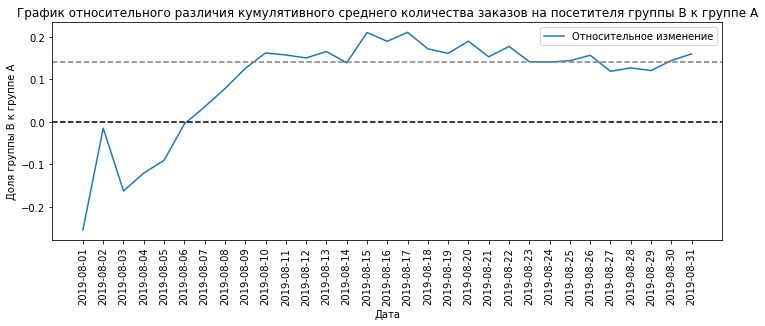

In [39]:
#Построим график относительного изменения 
#кумулятивного среднего количества заказов 
#на посетителя группы В к группе А
fig = plt.figure(figsize=(12,4))
plt.plot(
    cumulative_data_merge['date'],
    cumulative_data_merge['avg_orders_b']/cumulative_data_merge['avg_orders_a']-1,
    label='Относительное изменение'
)
plt_view('Дата', 'Доля группы В к группе А'
         , 'График относительного различия кумулятивного среднего количества заказов на посетителя группы В к группе А')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--');

С 6 дня после начала теста в группе В становится выше среднее количество заказов (относительно группы А) и далее с каждым днем оно становится лучше и лучше и в итоге оно зафиксировался около прироста в 14% относительно группы А

#### Вывод
<a id="17"></a>

Анализируя кумулятивную выручку обеих групп, мы увидели, что группа В с самого начала теста была в ровень или немного лучше показателей в группе А, а скачек выручки 19 августа позволил показателям в группе В сильно опередить группу А.

Анализируя кумулятивные средние чеки мы увидели несколько колебаний значений в обеих группах. Также был замечен резкий скачек средних чеков группы В 19 августа, однако после него снижение показателей. Хоть и группа В лидирует.

Данные относительных различий средних чеков группы В относительно группы А подтверждают колебания значений средних чеков (на 3, 8, 11, 19 дни проведения теста). Скорее всего, именно в эти даты были совершены аномальные заказы в той или иной группе. Если это действительно так, то в заключительном анализе их нужно будет удалить, чтобы они не искажали результаты нашего исследования.

Изучая количество заказов сделанное посетителями каждой из групп, выявили что уже в первой половине теста (с 6го дня) стала лидировать группа В и с каждым днем количество заказов от посетителей улучшалось относительно группы А. И примерно с 20 дня доля заказов группы В зафиксировалась около одного значения (около 2,9% заказов от посетителей). Прирост количества заказов группы В к окночанию теста состовляет примерно 14% относительно группы А.

Однако необходимо оценить аномальные заказы (сумму и количества) и посмотреть как они влияют на наши показатели

### Анализ количества заказов
<a id="18"></a>

Мы понимаем, что часть пользователей могли совершить 1 заказ, часть 2, 3 и более заказов, а часть просто посетить интернет-магазин не совершив ни одного заказа. Необходимо получить эти данные

In [40]:
#Сначала получим данные по количеству совершенных заказов пользователями
orders_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
    .sort_values(by='transaction_id', ascending=False)
)
orders_users.head(10)

,visitor_id,transaction_id
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Видим, что есть пользователи и с 3 и с 2 заказами. Посмотрим, какое количество заказов встречается чаще

#### Точечный график количества заказов по пользователям
<a id="19"></a>

Построим точечную диаграмму заказов по пользователям

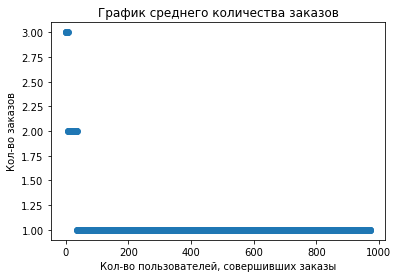

In [41]:
#серия из чисел от 0 до количества наблюдений в данных по количеству совершенных заказов
x_values = pd.Series(range(0, len(orders_users)))
plt.scatter(x_values, orders_users['transaction_id'])
plt_scat_view('Кол-во пользователей, совершивших заказы', 'Кол-во заказов', 'График среднего количества заказов');

Чаще всего посетители совершают всего 1 заказ, 2 и 3 заказа - это большая редкость. Они вполне могут быть аномальными (ведь есть еще и пользователи не совершившие ни одного заказа), чтобы в это убедится нужно оценить перцентили

#### Считаем 95-й и 99-й перцентили количества заказов на пользователя, для выбора границы аномальных пользователей
<a id="20"></a>

In [42]:
np.percentile(orders_users['transaction_id'], [95, 99])

array([1., 2.])

Не более 5% пользователей совершали 1 заказ. А не более 1% пользователей совершили 2 и более заказов. Из этого можно сделать вывод, что в основном преобладают пользователи-посетители, т.е. те которые посетили интернет-магазин не совершив ни одного заказа.

Выберем "2 и более заказов" для границы количества заказов аномальных пользователей

### Анализ стоимостей заказов
<a id="21"></a>

#### Точечный график стоимостей заказов
<a id="22"></a>

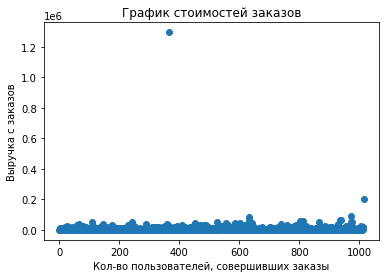

In [43]:
#серия из чисел от 0 до количества наблюдений в данных о заказах
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt_scat_view('Кол-во пользователей, совершивших заказы', 'Выручка с заказов', 'График стоимостей заказов');

Большинство заказов находятся в границах до 100000, присутствует всего один заказ на сумму около 200000 и один заказ на сумму более 1 млн. 

Давайте отфильтруем крупные заказы и посмотрим поближе на распределение остальных заказов

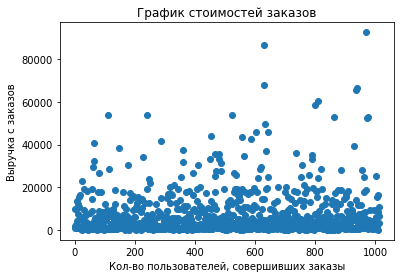

In [44]:
#серия из чисел от 0 до количества наблюдений в данных о заказах
x_values = pd.Series(range(0, len(orders.query('revenue <= 200000')['revenue'])))
plt.scatter(x_values, orders.query('revenue <= 200000')['revenue'])
plt_scat_view('Кол-во пользователей, совершивших заказы', 'Выручка с заказов', 'График стоимостей заказов');

И тут мы видим, что тут тоже есть редкие стоимости заказов - заказы выше 50000 редки. Скорее всего это и есть наши аномальные скачки в выручке и среднем чеке. Проверим перцентили

#### Считаем 95-й и 99-й перцентили стоимости заказов, для выбора границы аномальных заказов
<a id="23"></a>

In [45]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов чек дороже 26785, и не более чем у 1% - дороже чем 53904. Эти значения гораздо меньше тех, что мы предполагали по точечному графику.

Выберем 53904 - как границу стоимости аномальных заказов

#### Вывод
<a id="24"></a>

Не более 5% пользователей совершили 1 заказ. А не более 1% пользователей совершили 2 и более заказов. Из этого можно сделать вывод, что в основном преобладают пользователи-посетители, т.е. те которые посетили интернет-магазин не совершив ни одного заказа.

Выберем "2 и более заказов" для границы количества заказов аномальных пользователей

Так как не более 5% заказов чек дороже 26785, и не более чем у 1% - дороже чем 53904, выберем 53904 - как границу стоимости аномальных заказов

### Анализ статистической значимости различий между групами по "сырым" и "очищенным" данным
<a id="25"></a>

Сначала нам необходимо определить отдельно посетителей группы А и посетители группы В, чтобы в дальнейшем расчитать посетителей без заказов

In [46]:
#Отдельно посетители группы А и посетители группы В
visitors_a = visitors[visitors['group'] =='A'][['date', 'visitors']]
visitors_a.columns = ['date', 'visitors_a']
visitors_b = visitors[visitors['group'] =='B'][['date', 'visitors']]
visitors_b.columns = ['date', 'visitors_b']

Для подсчета стат значимости нам необходимо определить пользователей совершивших и не совершивших заказы

In [47]:
#Определяем пользователей совершивших хотя бы один заказ в каждой группе
orders_users_a = (
    orders[orders['group']=='A']
    .groupby('visitor_id',as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_users_a.columns = ['visitors_id', 'orders']
orders_users_b = (
    orders[orders['group']=='B']
    .groupby('visitor_id',as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_users_b.columns = ['visitors_id', 'orders']

In [48]:
#Объявим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя
#а пользователям без заказов - нули
sampleA = (pd.concat(
    [orders_users_a['orders'],
     pd.Series(0, index=np.arange(visitors_a['visitors_a'].sum() - len(orders_users_a['orders'])),
               name='orders')], axis=0)
          )
sampleB = (pd.concat(
    [orders_users_b['orders'],
     pd.Series(0, index=np.arange(visitors_b['visitors_b'].sum() - len(orders_users_b['orders'])),
               name='orders')], axis=0)
          )

Теперь можем посчитать статистическую значимость различий параметров между группой А и группой В по "сырым" данным. Для этого применим непараметричекий тест Манна-Уитни (из-за наличия аномалий в данных) и выведем p_value. Если значение p_value будет менее 0,05 значит группы различны.

А также посчитаем относительное различие показателей между группами

#### Статистическая  значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
<a id="26"></a>

Сформулируем гипотезы для проверки:

**Нулевая гипотеза** - Среднее количество заказов на посетителя между группами А и В по "сырым" данным одинаковое

**Альтернативная гипотеза** - Среднее количество заказов на посетителя между группами А и В по "сырым" данным различается

In [49]:
#Посчитаем стат значимость различий в среднем количестве заказов на посетителя между группами
print("p_value - {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

p_value - 0.011


In [50]:
#Посчитаем относительное различие между группами
print("Относительная разница количества заказов на посетителя между группами - {0:.3f}"
      .format(sampleB.mean() / sampleA.mean() - 1))

Относительная разница количества заказов на посетителя между группами - 0.160


Так как 0.01 < 0.05, можно сделать вывод, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия. Относительный прирост среднего количества заказов на посетителя в группе В относительно группы А составляет 16%

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
<a id="27"></a>

Сформулируем гипотезы для проверки:

**Нулевая гипотеза** - Средний чек заказов между группами А и В по "сырым" данным одинаковый

**Альтернативная гипотеза** - Средний чек заказов между группами А и В по "сырым" данным различается

In [51]:
#Посчитаем стат значимость различий в среднем чеке заказа между группами
print("p_value - {0:.3f}".format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                    orders[orders['group']=='B']['revenue'])[1])
     )

p_value - 0.829


In [52]:
#Посчитаем относительное различие между группами
print("Относительная разница средних чеков заказов между группами - {0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean()
    /orders[orders['group']=='A']['revenue'].mean()-1)
     )

Относительная разница средних чеков заказов между группами - 0.287


P_value значительно выше чем 0.05 - значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке (групп) есть различия, нет. Однако относительный прирост среднего чека группы В к группе А составляет целых 28,7% - скорее всего тут влияют наши аномалии

Теперь очистим данные от наших аномальных значений по количеству заказов (2 и более заказов) и по выручке с заказов (заказы дороже 53904) и вновь проверим статистические показатели

In [53]:
#Пользователи с числом заказов больше 2 (это был 99 перцентиль)
users_many_orders = pd.concat(
    [orders_users_a[orders_users_a['orders'] >= np.percentile(orders_users['transaction_id'], 99)]['visitors_id'],
     orders_users_b[orders_users_b['orders'] >= np.percentile(orders_users['transaction_id'], 99)]['visitors_id']
    ], axis=0)

In [54]:
#Пользователи с суммой заказа свыше 53000
users_many_revenue = orders[orders['revenue'] >= np.percentile(orders['revenue'], 99)]['visitor_id']

In [55]:
#Объеденим их в общей таблице с аномалиями
anomal_users = (
    pd.concat([users_many_orders, users_many_revenue], axis=0)
    .drop_duplicates().sort_values()
)

Теперь у нас есть список аномальных пользователей, которых необходимо будет исключить из нашего исследования. Давайте оценим потери в данных при удалении этих пользователей.

In [57]:
#Абсолютные потери
print('Абсолютные потери, при удалении аномальных пользователей - {}'.format(len(anomal_users)))
#Относительные потери
print('Относительные потери, при удалении аномальных пользователей - {0:.2%}'
      .format(len(anomal_users)/(orders['visitor_id'].nunique())))

Абсолютные потери, при удалении аномальных пользователей - 48
Относительные потери, при удалении аномальных пользователей - 4.93%


При очистки данных от аномальных пользователей мы потеряем около 5% данных. Это не очень много, но и не мало. На будущее лучше не допускать такого

In [58]:
#Объявим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя
#а пользователям без заказов - нули, с исключением аномальных пользователей
sampleA_filt = (pd.concat(
    [orders_users_a[np.logical_not(orders_users_a['visitors_id'].isin(anomal_users))]['orders'],
     pd.Series(0, index=np.arange(visitors_a['visitors_a'].sum() - len(orders_users_a['orders'])),
               name='orders')], axis=0)
          )
sampleB_filt = (pd.concat(
    [orders_users_b[np.logical_not(orders_users_b['visitors_id'].isin(anomal_users))]['orders'],
     pd.Series(0, index=np.arange(visitors_b['visitors_b'].sum() - len(orders_users_b['orders'])),
               name='orders')], axis=0)
          )

Теперь можем перечитать статистическую значимость различий параметров между группой А и группой В по "очищенным" данным. Для этого применим непараметричекий тест Манна-Уитни (из-за наличия аномалий в данных) и выведем p_value. Если значение p_value будет менее 0,05 значит группы различны.

А также посчитаем относительное различие показателей между группами

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
<a id="28"></a>

Сформулируем гипотезы для проверки:

**Нулевая гипотеза** - Среднее количество заказов на посетителя между группами А и В по "очищенным" данным одинаковое

**Альтернативная гипотеза** - Среднее количество заказов на посетителя между группами А и В по "очищенным" данным различается

In [59]:
#Посчитаем стат значимость различий в среднем количестве заказов на посетителя между группами
print("p_value - {0:.5f}".format(st.mannwhitneyu(sampleA_filt, sampleB_filt)[1]))

p_value - 0.00735


In [60]:
#Посчитаем относительное различие между группами
print("Относительная разница количества заказов на посетителя между группами - {0:.5f}"
      .format(sampleB_filt.mean() / sampleA_filt.mean() - 1))

Относительная разница количества заказов на посетителя между группами - 0.19080


После очистки данных значение p_value стало еще ниже 0.007 (было 0.01), что значительно ниже 0.05 - значит разница между среднем количеством заказов на посетителя в группах сильно разнятся. Причем выигрывает группа В - ее прирост количества заказов на посетителя составляет 19%

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
<a id="29"></a>

Сформулируем гипотезы для проверки:

**Нулевая гипотеза** - Средний чек заказов между группами А и В по "очищенным" данным одинаковый

**Альтернативная гипотеза** - Средний чек заказов между группами А и В по "очищенным" данным различается

In [61]:
#Посчитаем стат значимость различий в среднем чеке заказа между группами
print("p_value - {0:.3f}".format(
    st.mannwhitneyu(
        orders[np.logical_and(orders['group'] == 'A',
                              np.logical_not(orders['visitor_id'].isin(anomal_users)))]['revenue'],
        orders[np.logical_and(orders['group'] == 'B',
                              np.logical_not(orders['visitor_id'].isin(anomal_users)))]['revenue'])
    [1])
     )

p_value - 0.973


In [62]:
#Посчитаем относительное различие средних чеков между группами
print("Относительная разница средних чеков заказов между группами - {0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B',
                          np.logical_not(orders['visitor_id'].isin(anomal_users)))]['revenue'].mean()
    /orders[np.logical_and(orders['group'] == 'A',
                           np.logical_not(orders['visitor_id'].isin(anomal_users)))]['revenue'].mean() - 1)
)

Относительная разница средних чеков заказов между группами - 0.024


После очистки данных p_value стал еще выше 0.97 (был 0.83), что также значительно больше 0.05 - значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке (групп) есть различия. Однако относительный прирост среднего чека группы В к группе А стал значительно ниже - всего 2.4% (был 28.6%), что не является статистически значимым отклонением

#### Вывод
<a id="30"></a>

Анализируя "сырые" данные мы видим, что группы различны между собой по количеству заказов на посетителя - в группе В (относительно группы А) почти на 16% в среднем преобладает заказов. А вот средний чек в группах похожий, однако средний чек группы В относительно группы А выше на 28,6% - скорее всего на результаты влияют аномальные значения выручки.

После очистки данных от аномальных значений, мы видим, что группы стали еще сильнее различны между собой по количеству заказов на посетителя - в группе В (относительно группы А) уже на 19% в среднем преобладает количество заказов. А вот средний чек в группах также остался похожим, но группа В уже имеет небольшой прирост среднего чека относительно группы А - всего 2,4%, что не является статистически значимым отклонением

## Решение по результатам теста
<a id='31'></a>

Анализируя кумулятивную выручку и средние чеки обеих групп, мы увидели, что группа В с самого начала теста была вровень или немного лучше показателей в группе А, а скачек выручки 19 августа позволил показателям в группе В сильно опередить группу А. После этого скачка значения обеих групп немного стабилизировались.

Изучая количество заказов сделанное посетителями каждой из групп, выявили что уже в первой половине теста (с 6го дня) стала лидировать группа В и с каждым днем количество заказов от посетителей улучшалось относительно группы А. И примерно с 20 дня доля заказов группы В зафиксировалась около одного значения (около 2,9% заказов от посетителей). Прирост количества заказов группы В к окночанию теста состовляет примерно 14% относительно группы А.

Для корректного изучения исследования нам необходимо было оценить аномальные заказы (сумму и количества) и посмотреть как они влияют на наши показатели.

Было выявлено, что:
- не более 5% пользователей совершили 1 заказ, а не более 1% пользователей совершили 2 и более заказов
- у не более 5% заказов чек дороже 26785, и не более чем у 1% - дороже чем 53904

Анализируя статистические значимости "сырых" данных мы видим, что группы различны между собой по количеству заказов на посетителя - в группе В (относительно группы А) почти на 16% в среднем преобладает заказов. А вот средний чек в группах похожий, однако средний чек группы В относительно группы А выше на 28,6% - скорее всего на результаты влияют аномальные значения выручки.

После очистки данных от аномальных значений, мы видим, что группы стали еще сильнее различны между собой по количеству заказов на посетителя - в группе В (относительно группы А) уже на 19% в среднем преобладает количество заказов, что является статистически значимым. А вот средний чек в группах также остался похожим, но группа В уже имеет небольшой прирост среднего чека относительно группы А - всего 2,4%, что не является статистически значимым отклонением.


**Решение**
Предлогаю остановить тест и зафиксировать победу группы В: различие среднего количества заказов на посетителя в группы В к группе А. В группе В оно гораздо больше, чем в группе А, однако это не приводит лишь к незначительному увеличению среднего чека в исследуемой группе В, которое не является статистически значимым, но оно все же присутутсвует. Так как p_value (для среднего чека) стал только выше можно предположить, что статистическая значимость и не появится.

При увеличении количества заказов при сохранении среднего чека одного заказа - приведет к росту выручки интернет-магазина. 